In [149]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from IPython.display import display

In [150]:
data=pd.read_excel('E://Target_Project//first_test_Target//digitallll_datatttta.xlsx')
data 

,Lead_source,Spec_Name,MonthFullName,No of Calls,Inbound Cost Group,Outbound Cost group,Outbound Leads Group,Group Volume,Group Revenue,Direct No of Cases Group,Inb_Vol,Inb_Rev,Direct Revenue Group
0,Facebook,Andrology Services,2024-01-01 00:00:00,19.0,NaN,1066.55,34.0,4.0,4983.55,4.0,3.0,2137.20,4983.55
1,Facebook,Andrology Services,February 2024,18.0,NaN,225.00,5.0,5.0,4967.93,5.0,4.0,2973.73,4967.93
2,Facebook,Andrology Services,March 2024,5.0,NaN,NaN,NaN,1.0,130.40,NaN,1.0,130.40,NaN
3,Facebook,Andrology Services,April 2024,9.0,NaN,NaN,NaN,2.0,1209.00,1.0,1.0,354.20,354.20
4,Facebook,Andrology Services,May 2024,8.0,NaN,1327.31,19.0,2.0,2139.60,1.0,1.0,112.50,2027.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,WhatsApp,Other,October 2024,NaN,NaN,NaN,NaN,39.0,73340.53,3.0,NaN,2277.50,39080.21
1881,WhatsApp,Other,November 2024,NaN,NaN,NaN,NaN,16.0,58400.53,NaN,NaN,NaN,40610.61
1882,WhatsApp,Other,December 2024,NaN,NaN,NaN,NaN,22.0,55591.20,3.0,NaN,NaN,35953.46
1883,WhatsApp,Other,January 2025,NaN,NaN,NaN,NaN,28.0,87105.79,1.0,NaN,1331.00,47037.76


In [151]:
data.isnull().sum()

Lead_source                    0
Spec_Name                      0
MonthFullName                  0
No of Calls                  833
Inbound Cost Group          1728
Outbound Cost group         1526
Outbound Leads Group         892
Group Volume                 483
Group Revenue                456
Direct No of Cases Group     545
Inb_Vol                      818
Inb_Rev                      790
Direct Revenue Group         507
dtype: int64

In [152]:
data.fillna(0, inplace=True)
# data.fillna(method='bfill', inplace=True)  

In [153]:
data.isnull().any().sum()

0

In [154]:
from scipy.stats import shapiro
numeric_cols = data.select_dtypes(include='number').columns

results = []
for col in numeric_cols:
    col_data = data[col].dropna()
    if len(col_data) < 3:
        continue
    stat, p = shapiro(col_data)
    results.append({
        'Feature': col,
        'Statistic': round(stat, 4),
        'P-value': round(p, 4),
        'Normal?': 'Yes' if p > 0.05 else 'No'
    })

result_df = pd.DataFrame(results)
result_df


,Feature,Statistic,P-value,Normal?
0,No of Calls,0.3028,0.0,No
1,Inbound Cost Group,0.2489,0.0,No
2,Outbound Cost group,0.3125,0.0,No
3,Outbound Leads Group,0.1179,0.0,No
4,Group Volume,0.5019,0.0,No
5,Group Revenue,0.4689,0.0,No
6,Direct No of Cases Group,0.4672,0.0,No
7,Inb_Vol,0.3245,0.0,No
8,Inb_Rev,0.3115,0.0,No
9,Direct Revenue Group,0.4522,0.0,No


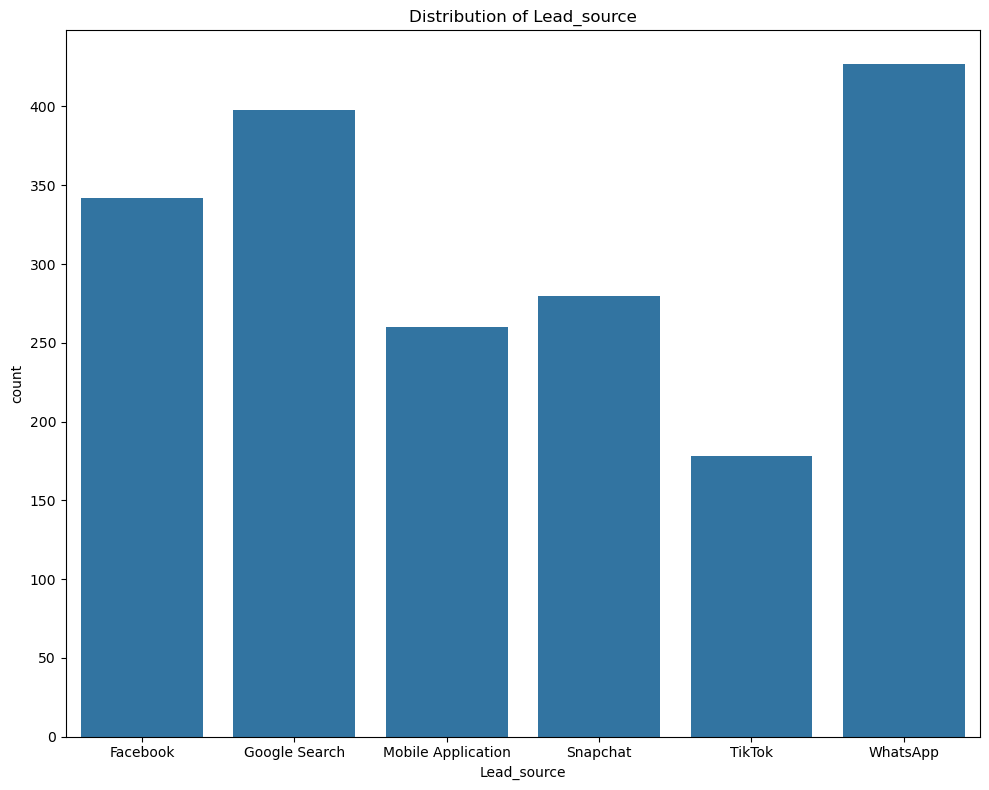

In [155]:
categorical_features = ['Lead_source']  
fig, ax = plt.subplots(figsize=(10, 8))  

for col in categorical_features:
    sns.countplot(x=data[col], ax=ax)  
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Lead_source               1885 non-null   object 
 1   Spec_Name                 1885 non-null   object 
 2   MonthFullName             1885 non-null   object 
 3   No of Calls               1885 non-null   float64
 4   Inbound Cost Group        1885 non-null   float64
 5   Outbound Cost group       1885 non-null   float64
 6   Outbound Leads Group      1885 non-null   float64
 7   Group Volume              1885 non-null   float64
 8   Group Revenue             1885 non-null   float64
 9   Direct No of Cases Group  1885 non-null   float64
 10  Inb_Vol                   1885 non-null   float64
 11  Inb_Rev                   1885 non-null   float64
 12  Direct Revenue Group      1885 non-null   float64
dtypes: float64(10), object(3)
memory usage: 191.6+ KB


In [157]:
describe = data.describe()
describe

,No of Calls,Inbound Cost Group,Outbound Cost group,Outbound Leads Group,Group Volume,Group Revenue,Direct No of Cases Group,Inb_Vol,Inb_Rev,Direct Revenue Group
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1.885000e+03,1885.000000,1885.000000,1885.000000,1885.000000
mean,64.743236,230.966605,691.110308,95.142706,43.185146,4.321991e+04,32.997347,21.968170,13676.120000,20984.754446
std,232.654975,997.642013,2416.675650,627.279290,96.605328,1.034120e+05,78.776974,73.251226,47091.991323,51216.452438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+02,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,5.000000,2.831150e+03,3.000000,1.000000,402.190000,1995.000000
75%,12.000000,0.000000,0.000000,34.000000,28.000000,3.130306e+04,21.000000,8.000000,4555.270000,15822.480000
max,2271.000000,10992.810000,33296.110000,9568.000000,733.000000,1.012085e+06,670.000000,682.000000,491321.760000,470877.100000


**Statistic  Method**

In [158]:
data['MonthFullName'] = pd.to_datetime(data['MonthFullName'])  
numeric_cols = data.select_dtypes(include=['number']).columns
monthly_avg = data.groupby(['MonthFullName', 'Lead_source', 'Spec_Name'])[numeric_cols].mean().reset_index()
monthly_avg

,MonthFullName,Lead_source,Spec_Name,No of Calls,Inbound Cost Group,Outbound Cost group,Outbound Leads Group,Group Volume,Group Revenue,Direct No of Cases Group,Inb_Vol,Inb_Rev,Direct Revenue Group
0,2024-01-01,Facebook,Andrology Services,19.0,0.00,1066.55,34.0,4.0,4983.55,4.0,3.0,2137.20,4983.55
1,2024-01-01,Facebook,Bariatric Surgery & Obesity,0.0,0.00,5972.94,149.0,0.0,0.00,0.0,0.0,0.00,0.00
2,2024-01-01,Facebook,Cardiology,10.0,2435.73,820.03,6.0,3.0,4555.27,3.0,3.0,4555.27,4555.27
3,2024-01-01,Facebook,Chest,8.0,0.00,0.00,0.0,3.0,3295.33,3.0,3.0,3295.33,3295.33
4,2024-01-01,Facebook,Dental,81.0,901.41,918.36,11.0,31.0,15192.91,30.0,31.0,15192.91,12321.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,2025-02-01,WhatsApp,Plastic Surgery,0.0,0.00,0.00,72.0,8.0,2785.36,7.0,0.0,0.00,2780.00
1881,2025-02-01,WhatsApp,Psychiatry,0.0,0.00,0.00,13.0,0.0,0.00,0.0,0.0,0.00,0.00
1882,2025-02-01,WhatsApp,Psychology,0.0,0.00,0.00,106.0,5.0,12202.08,5.0,0.0,620.60,8478.48
1883,2025-02-01,WhatsApp,Urology,0.0,0.00,0.00,136.0,105.0,183063.10,54.0,1.0,50.00,49872.79


In [159]:
monthly_avg.to_excel('Monthly Avg.xlsx')

In [160]:
agg_data = monthly_avg.groupby(['Lead_source', 'Spec_Name'])[numeric_cols].agg(['mean', 'max'])
agg_data

No of Calls       Inbound Cost Group  \
                                               mean   max               mean   
Lead_source Spec_Name                                                          
Facebook    Andrology Services             8.571429  19.0           0.000000   
            Audiological medicine          1.500000   3.0           0.000000   
            Bariatric Surgery & Obesity    0.500000   2.0          13.688571   
            Cardiology                     7.357143  10.0         204.229286   
            Chest                          4.785714  11.0           0.000000   
...                                             ...   ...                ...   
WhatsApp    Psychiatry                     0.000000   0.0           0.000000   
            Psychology                     0.357143   5.0           0.000000   
            Salon                          0.000000   0.0           0.000000   
            Urology                        0.428571   6.0           0.000000   
            Vascular Surgery               0.071429   1.0           0.000000   

                                                 Outbound Cost group           \
                                             max                mean      max   
Lead_source Spec_Name                                                           
Facebook    Andrology Services              0.00         1296.989286  3053.72   
            Audiological medicine           0.00            0.000000     0.00   
            Bariatric Surgery & Obesity   191.64         4844.337857  6839.76   
            Cardiology                   2435.73         1186.930000  2688.43   
            Chest                           0.00           19.639286   274.95   
...                                          ...                 ...      ...   
WhatsApp    Psychiatry                      0.00            0.000000     0.00   
            Psychology                      0.00            0.000000     0.00   
            Salon                           0.00            0.000000     0.00   
            Urology                         0.00            0.000000     0.00   
            Vascular Surgery                0.00            0.000000     0.00   

                                        Outbound Leads Group         \
                                                        mean    max   
Lead_source Spec_Name                                                 
Facebook    Andrology Services                     32.642857  174.0   
            Audiological medicine                   1.000000    8.0   
            Bariatric Surgery & Obesity           118.000000  188.0   
            Cardiology                             17.285714   40.0   
            Chest                                   0.214286    3.0   
...                                                      ...    ...   
WhatsApp    Psychiatry                             13.714286   18.0   
            Psychology                             72.071429  149.0   
            Salon                                   2.250000    5.0   
            Urology                               108.357143  224.0   
            Vascular Surgery                       13.428571   39.0   

                                        Group Volume         Group Revenue  \
                                                mean    max           mean   
Lead_source Spec_Name                                                        
Facebook    Andrology Services              3.000000    7.0    2194.197857   
            Audiological medicine           1.125000    4.0     344.437500   
            Bariatric Surgery & Obesity     0.000000    0.0       0.000000   
            Cardiology                      4.142857   10.0   13220.949286   
            Chest                           2.714286    7.0    3075.502857   
...                                              ...    ...            ...   
WhatsApp    Psychiatry                      0.000000    0.0       0.000000   
         

In [161]:
# for col in numeric_cols:
#     agg_data[(col, 'lower_bound')] = agg_data[(col, 'mean')] * 0.9
#     agg_data[(col, 'upper_bound')] = agg_data[(col, 'mean')] * 1.1


# new_columns = []
# for col in numeric_cols:
#     new_columns.extend([(col, 'mean'), (col, 'max'), (col, 'lower_bound'), (col, 'upper_bound')])

# agg_data = agg_data[new_columns]
# agg_data.columns = ['_'.join(col).strip() for col in agg_data.columns]# to rename features 
# agg_data.reset_index(inplace=True)
# agg_data

In [162]:
grouped = data.groupby(['Lead_source', 'Spec_Name'])
agg_data = grouped[numeric_cols].agg(['mean', 'max'])


for col in numeric_cols:
    agg_data[(col, 'lower_bound')] = grouped[col].quantile(0.10)
    agg_data[(col, 'upper_bound')] = grouped[col].quantile(0.90)

new_columns = []
for col in numeric_cols:
    new_columns.extend([(col, 'mean'), (col, 'max'), (col, 'lower_bound'), (col, 'upper_bound')])

agg_data = agg_data[new_columns]
agg_data.columns = ['_'.join(col).strip() for col in agg_data.columns]
agg_data.reset_index(inplace=True)
agg_data


,Lead_source,Spec_Name,No of Calls_mean,No of Calls_max,No of Calls_lower_bound,No of Calls_upper_bound,Inbound Cost Group_mean,Inbound Cost Group_max,Inbound Cost Group_lower_bound,Inbound Cost Group_upper_bound,...,Inb_Vol_lower_bound,Inb_Vol_upper_bound,Inb_Rev_mean,Inb_Rev_max,Inb_Rev_lower_bound,Inb_Rev_upper_bound,Direct Revenue Group_mean,Direct Revenue Group_max,Direct Revenue Group_lower_bound,Direct Revenue Group_upper_bound
0,Facebook,Andrology Services,8.571429,19.0,4.0,16.2,0.000000,0.00,0.0,0.000,...,0.0,3.0,686.197857,2973.73,0.000,2110.680,1960.955000,5038.25,263.760,4978.864
1,Facebook,Audiological medicine,1.500000,3.0,0.7,2.3,0.000000,0.00,0.0,0.000,...,0.0,2.0,62.812500,270.00,0.000,165.000,256.937500,1823.00,0.000,630.900
2,Facebook,Bariatric Surgery & Obesity,0.500000,2.0,0.0,1.0,13.688571,191.64,0.0,0.000,...,0.0,0.0,0.000000,0.00,0.000,0.000,0.000000,0.00,0.000,0.000
3,Facebook,Cardiology,7.357143,10.0,5.0,10.0,204.229286,2435.73,0.0,296.436,...,0.3,6.1,2526.795000,8187.56,45.000,5677.951,3107.457857,9850.57,45.000,5067.045
4,Facebook,Chest,4.785714,11.0,1.3,8.7,0.000000,0.00,0.0,0.000,...,1.0,5.4,2507.148571,7483.89,787.752,5935.468,2571.130714,8005.99,787.752,6122.921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,WhatsApp,Psychiatry,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.000,...,0.0,0.0,0.000000,0.00,0.000,0.000,0.000000,0.00,0.000,0.000
176,WhatsApp,Psychology,0.357143,5.0,0.0,0.0,0.000000,0.00,0.0,0.000,...,0.0,1.0,591.656429,3462.60,0.000,1940.821,6657.440000,19365.02,1878.260,10580.808
177,WhatsApp,Salon,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.000,...,0.0,0.0,0.000000,0.00,0.000,0.000,0.000000,0.00,0.000,0.000
178,WhatsApp,Urology,0.428571,6.0,0.0,0.0,0.000000,0.00,0.0,0.000,...,1.0,5.7,2794.120000,8764.96,127.010,5297.519,33958.332857,74444.93,17849.896,57010.106


In [163]:
agg_data.to_excel('agg_data.xlsx')

In [164]:
agg_data.columns 

Index(['Lead_source', 'Spec_Name', 'No of Calls_mean', 'No of Calls_max',
       'No of Calls_lower_bound', 'No of Calls_upper_bound',
       'Inbound Cost Group_mean', 'Inbound Cost Group_max',
       'Inbound Cost Group_lower_bound', 'Inbound Cost Group_upper_bound',
       'Outbound Cost group_mean', 'Outbound Cost group_max',
       'Outbound Cost group_lower_bound', 'Outbound Cost group_upper_bound',
       'Outbound Leads Group_mean', 'Outbound Leads Group_max',
       'Outbound Leads Group_lower_bound', 'Outbound Leads Group_upper_bound',
       'Group Volume_mean', 'Group Volume_max', 'Group Volume_lower_bound',
       'Group Volume_upper_bound', 'Group Revenue_mean', 'Group Revenue_max',
       'Group Revenue_lower_bound', 'Group Revenue_upper_bound',
       'Direct No of Cases Group_mean', 'Direct No of Cases Group_max',
       'Direct No of Cases Group_lower_bound',
       'Direct No of Cases Group_upper_bound', 'Inb_Vol_mean', 'Inb_Vol_max',
       'Inb_Vol_lower_bound', 'I

In [165]:
df=pd.read_excel('E://Target_Project//first_test_Target//newTarget.xlsx')
df 

,Lead_source,Spec_Name,Inb_Vol,No of Calls,Inbound Cost Group,Outbound Leads Group,Group Revenue,Inb_Rev,Direct Revenue Group,Outbound Cost group,Direct No of Cases Group,Group Volume
0,Facebook,Andrology Services,8.5358,9.699773,77.598182,15.775453,21028.024641,16998.639684,3628.067873,210.544272,5.205899,14.342178
1,Google Search,Andrology Services,109.7460,246.343434,2709.777778,51.121763,74647.500584,63744.898815,8372.464322,595.636364,12.013614,125.362488
2,Mobile Application,Andrology Services,0.0000,0.000000,NaN,2.000000,419.000000,NaN,279.000000,254.000000,0.000000,0.000000
3,Snapchat,Andrology Services,3.6582,4.572750,36.582000,4.004538,4928.219334,4249.659921,558.164288,32.391426,0.800908,4.659267
4,TikTok,Andrology Services,0.0000,0.000000,NaN,5.000000,837.000000,NaN,837.000000,49.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
133,Google Search,Family Medicine,603.0000,1147.000000,11470.000000,304.598629,444771.956641,379811.020461,49885.626568,3548.978182,71.580678,696.047668
134,Mobile Application,Family Medicine,0.0000,0.000000,NaN,11.000000,2494.000000,NaN,1663.000000,1515.000000,2.000000,4.000000
135,Snapchat,Family Medicine,20.1000,25.125000,251.250000,23.860226,29363.793014,25320.734697,3325.708438,192.997729,4.772045,26.064656
136,TikTok,Family Medicine,0.0000,0.000000,NaN,28.000000,4989.000000,NaN,4989.000000,289.000000,7.000000,7.000000


In [166]:
df.isnull().sum()

Lead_source                  0
Spec_Name                    0
Inb_Vol                      0
No of Calls                  0
Inbound Cost Group          70
Outbound Leads Group         0
Group Revenue                0
Inb_Rev                     69
Direct Revenue Group         0
Outbound Cost group          0
Direct No of Cases Group     0
Group Volume                 0
dtype: int64

In [167]:
df.fillna(0, inplace=True)
df.isnull().any()

Lead_source                 False
Spec_Name                   False
Inb_Vol                     False
No of Calls                 False
Inbound Cost Group          False
Outbound Leads Group        False
Group Revenue               False
Inb_Rev                     False
Direct Revenue Group        False
Outbound Cost group         False
Direct No of Cases Group    False
Group Volume                False
dtype: bool

In [168]:
agg_data.columns = agg_data.columns.str.strip()
df.columns = df.columns.str.strip()

In [169]:
comparison_results = []

for index, new_row in df.iterrows():
    lead_source = new_row['Lead_source']
    spec_name = new_row['Spec_Name']
    
    old_row = agg_data[(agg_data['Lead_source'] == lead_source) & (agg_data['Spec_Name'] == spec_name)]
    if old_row.empty:
        continue   
    result = {
            'Lead_source': lead_source,
            'Spec_Name': spec_name
          }
        
    for col in df.columns:
        if col not in ['Lead_source', 'Spec_Name']:
            lower_bound = old_row[f"{col}_lower_bound"].values[0]
            upper_bound = old_row[f"{col}_upper_bound"].values[0]
            new_value = new_row[col]

            if new_value < lower_bound:
                status = "Below Range"
            elif new_value > upper_bound:
                status = "Above Range"
            else:
                status = "Within Range"

            result[col] = new_value
            result[f"{col}_status"] = status
    

    comparison_results.append(result)
final_df = pd.DataFrame(comparison_results)
final_df

,Lead_source,Spec_Name,Inb_Vol,Inb_Vol_status,No of Calls,No of Calls_status,Inbound Cost Group,Inbound Cost Group_status,Outbound Leads Group,Outbound Leads Group_status,...,Inb_Rev,Inb_Rev_status,Direct Revenue Group,Direct Revenue Group_status,Outbound Cost group,Outbound Cost group_status,Direct No of Cases Group,Direct No of Cases Group_status,Group Volume,Group Volume_status
0,Facebook,Andrology Services,8.5358,Above Range,9.699773,Within Range,77.598182,Above Range,15.775453,Within Range,...,16998.639684,Above Range,3628.067873,Within Range,210.544272,Within Range,5.205899,Above Range,14.342178,Above Range
1,Google Search,Andrology Services,109.7460,Above Range,246.343434,Above Range,2709.777778,Above Range,51.121763,Below Range,...,63744.898815,Above Range,8372.464322,Below Range,595.636364,Within Range,12.013614,Below Range,125.362488,Above Range
2,Mobile Application,Andrology Services,0.0000,Within Range,0.000000,Within Range,0.000000,Within Range,2.000000,Within Range,...,0.000000,Within Range,279.000000,Below Range,254.000000,Above Range,0.000000,Below Range,0.000000,Below Range
3,Snapchat,Andrology Services,3.6582,Above Range,4.572750,Above Range,36.582000,Within Range,4.004538,Within Range,...,4249.659921,Above Range,558.164288,Within Range,32.391426,Within Range,0.800908,Within Range,4.659267,Above Range
4,TikTok,Andrology Services,0.0000,Within Range,0.000000,Below Range,0.000000,Within Range,5.000000,Above Range,...,0.000000,Within Range,837.000000,Within Range,49.000000,Within Range,1.000000,Above Range,1.000000,Above Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Google Search,Family Medicine,603.0000,Above Range,1147.000000,Above Range,11470.000000,Above Range,304.598629,Above Range,...,379811.020461,Above Range,49885.626568,Within Range,3548.978182,Above Range,71.580678,Within Range,696.047668,Above Range
133,Mobile Application,Family Medicine,0.0000,Within Range,0.000000,Within Range,0.000000,Within Range,11.000000,Within Range,...,0.000000,Within Range,1663.000000,Within Range,1515.000000,Above Range,2.000000,Within Range,4.000000,Within Range
134,Snapchat,Family Medicine,20.1000,Above Range,25.125000,Above Range,251.250000,Above Range,23.860226,Above Range,...,25320.734697,Above Range,3325.708438,Above Range,192.997729,Above Range,4.772045,Above Range,26.064656,Above Range
135,TikTok,Family Medicine,0.0000,Below Range,0.000000,Within Range,0.000000,Within Range,28.000000,Above Range,...,0.000000,Within Range,4989.000000,Above Range,289.000000,Above Range,7.000000,Above Range,7.000000,Above Range


In [170]:
final_df.to_excel('final_df.xlsx',index=False)

**ML**

In [171]:
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.multioutput import MultiOutputRegressor

# # X = data[['Actual Inbound Cost', 'Actual Lead Generation Cost', 'Actual Calls', 'Actual Leads', 'Actual Volume', 'Actual Revenue']]
# X = data[['Actual Cost ', 'Target Cost',
#        'Actual Inbound Cost', 'Target Inbound Cost',
#        'Actual Lead Generation Cost', 'Target Lead Generation Cost',
#        'Target Leads', 'Touchability%', 'Not Reached%', 'Reachability%',
#        'Actual Lead CR%', 'Target Lead CR%',
#        'Actual CR% Calls', 'Lead Generation Direct Volume',
#        'Lead Generation Indirect Volume', 'Inbound Volume',
#        'Inbound Direct Volume', 'Inbound Indirect Volume', 'Referral Volume',
#        'Target Volume', 'Actual RPP',  'Direct Revenue',
#        'Indirect Revenue', 'Inbound Revenue', 'Referral Revenue',
#        'Target Revenue', 'Actual Cost Ratio%', 'Target Cost Ratio%']]
# kpis = ['Actual Revenue', 'Actual Volume', 'Actual Leads', 'Actual Calls']
# y = data[kpis]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [172]:
#Train a multi-output regression model using XGBoost
# xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=10, n_estimators=500, random_state=42)
# multi_model = MultiOutputRegressor(xgb_model)
# multi_model.fit(X_train, y_train)

In [173]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# predictions = multi_model.predict(X_test)
# mae = mean_absolute_error(y_test, predictions)
# mse = mean_squared_error(y_test, predictions)
# r2 = r2_score(y_test, predictions)

# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(f"R² Score: {r2:.2f}")

In [174]:
# X_test_with_channel = X_test.copy()
# X_test_with_channel['Lead_source'] = data.loc[X_test.index, 'Lead_source']

In [175]:

# pred_df = pd.DataFrame(predictions, columns=[f"Predicted {kpi}" for kpi in kpis], index=X_test.index)
# # pred_df['Lead_source'] = data.loc[X_test.index, 'Lead_source']
# # pred_df['Specialty'] = data.loc[X_test.index, 'Specialty']
# pred_df.insert(0, 'Lead_source', data.loc[X_test.index, 'Lead_source'])
# pred_df.insert(1, 'Specialty', data.loc[X_test.index, 'Specialty'])
# pred_df

In [176]:
# pred_df.to_excel('Predicted_Digital.xlsx',index=False)

In [177]:
# pred_df.shape

In [178]:
pip install XlsxWriter

Note: you may need to restart the kernel to use updated packages.
